# MÉTODOS DE OVERSAMPLING
A abordagem mais simples para realizar o oversample da classe minoritária é duplicando exemplos aleatoriamente, apesar de não adicionar nenhuma nova informação ao modelo.

Ao invés disso, novos exemplos podem ser gerados sinteticamente a partir de outros já existentes.

Esse tipo de alargamento da classe minoritária é chamada Synthetic Monority Oversampling Technique (SMOTE).

## Synthetic Minority Oversampling Technique
No SMOTE, o modelo em treinamento é alterado adicionando instâncias geradas sinteticamente da classe minoritária, tornando a distribuição de dados entre as classes mais balanceada.

### SMOTE na prática

In [4]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from numpy import where
import csv

In [5]:
def export_csv(name, X, y):
  with open(name+'.csv', 'w', newline='') as file:
      writer = csv.writer(file)
      field = ["x coordenate", "y coordenate", "class"]
      writer.writerow(field)
      i = 0
      for point in X:
        s = f'{point}'
        row = s.strip('[]').split()
        row.append(y[i])
        writer.writerow(row)
        i += 1

Counter({0: 9900, 1: 100})


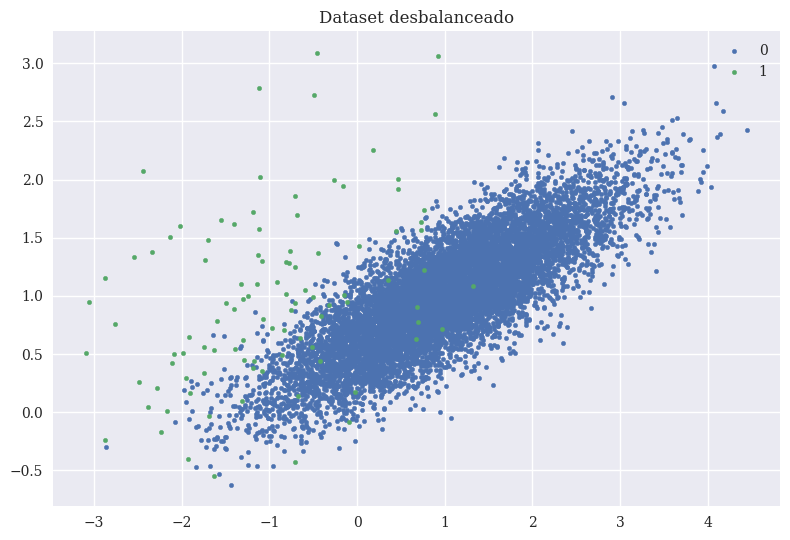

In [6]:
plt.style.use('default')
plt.style.use('seaborn-v0_8')
#plt.style.use('bmh')
plt.rcParams['font.family'] = 'Serif'

#plt.figure(figsize=(5,4))
# definir dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99],
                           flip_y=0, random_state=1)

counter = Counter(y)
print(counter)

# scatter plot dos exemplos por class label
for label, _ in counter.items():
  row_xi = where(y == label)[0]
  plt.scatter(X[row_xi, 0], X[row_xi, 1], 10,label = str(label))

#plt.grid(False)
plt.title('Dataset desbalanceado')
plt.legend()
plt.tight_layout()
plt.savefig('dsdesbalanceado.png')
plt.show()
plt.close()

# SMOTE padrão:

Counter({0: 9900, 1: 9900})


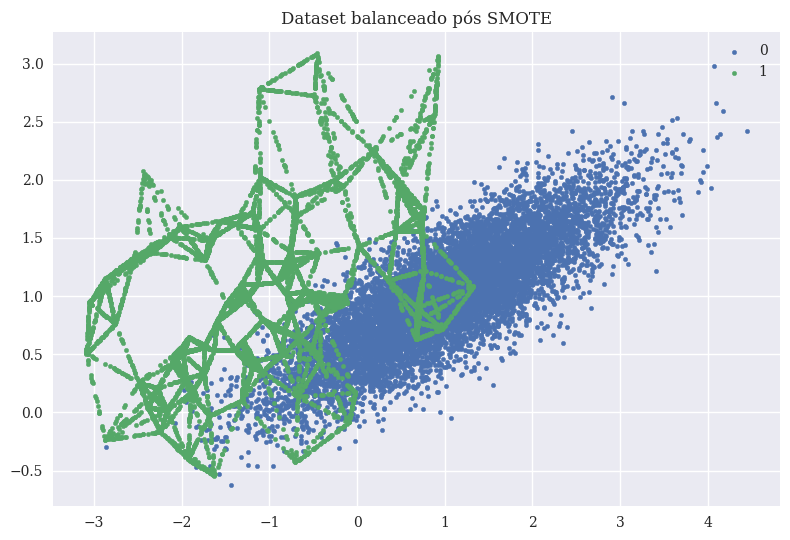

In [7]:
from imblearn.over_sampling import SMOTE
# transformar o dataset
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X, y)

# sumarizar a nova distribuição de classes
counter = Counter(y_over)
print(counter)

# scatter plot do dataset após SMOTE
for label, _ in counter.items():
  row_xi = where(y_over == label)[0]
  plt.scatter(X_over[row_xi, 0], X_over[row_xi, 1], 10, label=str(label))

plt.title('Dataset balanceado pós SMOTE')
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

In [8]:
## exportando dataset
export_csv('original', X, y)
export_csv('smote', X_over, y_over)

Avaliando o modelo

---



In [9]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# definir modelo
model = DecisionTreeClassifier()
# avaliar pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc',
                         cv=cv, n_jobs=-1)
print('Mean ROC AUC before-SMOTE: %.3f' % mean(scores))

scores = cross_val_score(model, X_over, y_over, scoring='roc_auc',
                         cv=cv, n_jobs=-1)
print('Mean ROC AUC after-SMOTE: %.3f' % mean(scores))

Mean ROC AUC before-SMOTE: 0.768
Mean ROC AUC after-SMOTE: 0.940


# BODERLINE SMOTE

* ignora "pontos de ruído" (noise points)
* Utiliza "pontos de borda/pontos limítrofes" (border points) para gerar novos dados

In [10]:
from imblearn.over_sampling import BorderlineSMOTE
plt.style.use('default')
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'Serif'

## BORDERLINE SMOTE kNN (*k Nearest Neighbours*)

Counter({0: 9900, 1: 9900})


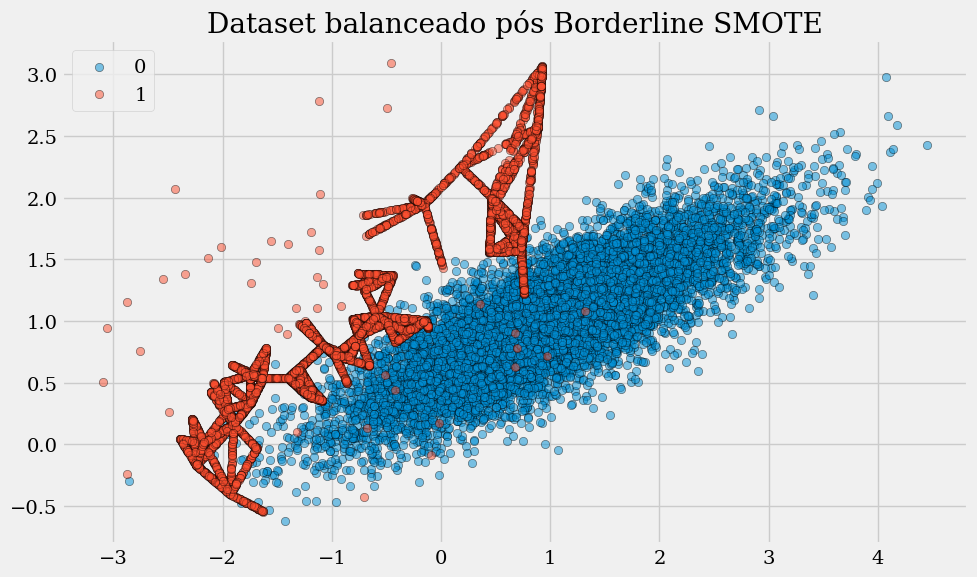

In [11]:
oversample = BorderlineSMOTE()
X_over, y_over = oversample.fit_resample(X,y)

counter = Counter(y_over)
print(counter)

plt.figure(figsize=(10,6))

for label, _ in counter.items():
  row_ix = where(y_over == label)[0]
  plt.scatter(X_over[row_ix, 0], X_over[row_ix, 1], label=str(label), alpha = 0.5,edgecolors='k')

plt.title('Dataset balanceado pós Borderline SMOTE')
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

## BORDERLINE SMOTE SVM ()